**<h1><font color="red">Titanic Survival Prediction: Logistic Regression, Random Forest, SVM</font></h1>**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic_data = pd.read_csv('/content/drive/MyDrive/RTF Class/27.12.2023/titanic.csv')

# Data preprocessing
# Drop unnecessary columns and handle missing values
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Split the dataset into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Support Vector Machine (SVM)
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svc_pred))

Logistic Regression Accuracy: 0.8100558659217877
Random Forest Accuracy: 0.8324022346368715
SVM Accuracy: 0.8212290502793296


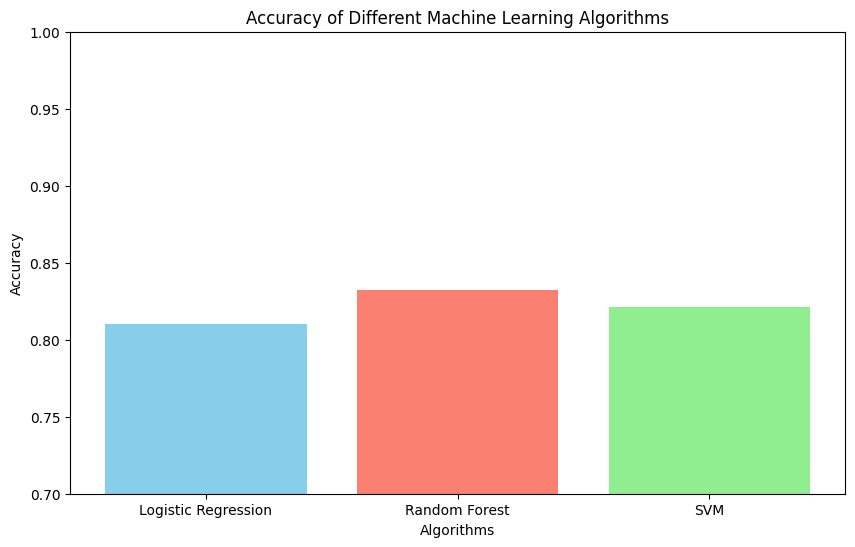

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for different algorithms
accuracy_scores = [accuracy_score(y_test, logreg_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, svc_pred)]
algorithms = ['Logistic Regression', 'Random Forest', 'SVM']

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Set y-axis limits for better visualization
plt.show()
